<a href="https://colab.research.google.com/github/ElenaNtm/Energy-price-predictions/blob/main/Visualization_Market_Results(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install kmodes

In [ ]:
from kmodes.kmodes import KModes

#Load Data

In [ ]:
path = "/content/drive/MyDrive/EL-CRIDA*_Results_HENEX.csv"
#df = pd.read_csv(path, parse_dates=["Trade Day"])
df = pd.read_csv(path)

the two indexes will be Instrument and Trading Day

In [ ]:
df.head()

,Unnamed: 0,TARGET,BIDDING_ZONE_DESCR,SIDE_DESCR,DDAY,ASSET_DESCR,CLASSIFICATION,DELIVERY_MTU,DELIVERY_DURATION,SORT,MCP,TOTAL_TRADES,PUB_TIME,VER
0,0,CRIDA1,Mainland Greece,Buy,20230101,GR-IT,Exports,2023-01-01 00:00:00,60,1,216.90,4.600,2022-12-31 16:21:50,1
1,1,CRIDA1,Mainland Greece,Buy,20230101,GR-IT,Exports,2023-01-01 19:00:00,60,20,264.42,1.600,2022-12-31 16:21:50,1
2,2,CRIDA1,Mainland Greece,Buy,20230101,GR-IT,Exports,2023-01-01 20:00:00,60,21,247.00,0.700,2022-12-31 16:21:50,1
3,3,CRIDA1,Mainland Greece,Buy,20230101,LOAD,LV,2023-01-01 00:00:00,60,1,216.90,23.745,2022-12-31 16:21:50,1
4,4,CRIDA1,Mainland Greece,Buy,20230101,LOAD,LV,2023-01-01 01:00:00,60,2,264.94,27.327,2022-12-31 16:21:50,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60104 entries, 0 to 60103
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          60104 non-null  int64  
 1   TARGET              60104 non-null  object 
 2   BIDDING_ZONE_DESCR  60104 non-null  object 
 3   SIDE_DESCR          60104 non-null  object 
 4   DDAY                60104 non-null  int64  
 5   ASSET_DESCR         60104 non-null  object 
 6   CLASSIFICATION      60104 non-null  object 
 7   DELIVERY_MTU        60104 non-null  object 
 8   DELIVERY_DURATION   60104 non-null  int64  
 9   SORT                60104 non-null  int64  
 10  MCP                 60104 non-null  float64
 11  TOTAL_TRADES        60104 non-null  float64
 12  PUB_TIME            60104 non-null  object 
 13  VER                 60104 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 6.4+ MB


#Bring the DDAY, DELIVERY_MTU and PUB_TIME columns to datetime form

In [ ]:
df['DDAY'] = pd.to_datetime(df['DDAY'], format="%Y%m%d")

In [ ]:
df['DELIVERY_MTU'] = pd.to_datetime(df['DELIVERY_MTU'])

In [ ]:
df['PUB_TIME'] = pd.to_datetime(df['PUB_TIME'])

In [ ]:
df.head()

,Unnamed: 0,TARGET,BIDDING_ZONE_DESCR,SIDE_DESCR,DDAY,ASSET_DESCR,CLASSIFICATION,DELIVERY_MTU,DELIVERY_DURATION,SORT,MCP,TOTAL_TRADES,PUB_TIME,VER
0,0,CRIDA1,Mainland Greece,Buy,2023-01-01,GR-IT,Exports,2023-01-01 00:00:00,60,1,216.90,4.600,2022-12-31 16:21:50,1
1,1,CRIDA1,Mainland Greece,Buy,2023-01-01,GR-IT,Exports,2023-01-01 19:00:00,60,20,264.42,1.600,2022-12-31 16:21:50,1
2,2,CRIDA1,Mainland Greece,Buy,2023-01-01,GR-IT,Exports,2023-01-01 20:00:00,60,21,247.00,0.700,2022-12-31 16:21:50,1
3,3,CRIDA1,Mainland Greece,Buy,2023-01-01,LOAD,LV,2023-01-01 00:00:00,60,1,216.90,23.745,2022-12-31 16:21:50,1
4,4,CRIDA1,Mainland Greece,Buy,2023-01-01,LOAD,LV,2023-01-01 01:00:00,60,2,264.94,27.327,2022-12-31 16:21:50,1


#Find Duplicate Indexes and Drop- NOT TO RUN WE DON'T HAVE DUPLICATE LINES

In [ ]:
bool_series = df.duplicated()

In [ ]:
[i for i, x in enumerate(bool_series) if x]

[]

#Missing Values

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
Unnamed: 0,0,0.0
TARGET,0,0.0
BIDDING_ZONE_DESCR,0,0.0
SIDE_DESCR,0,0.0
DDAY,0,0.0
ASSET_DESCR,0,0.0
CLASSIFICATION,0,0.0
DELIVERY_MTU,0,0.0
DELIVERY_DURATION,0,0.0
SORT,0,0.0


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

#Bar plot to see the different values of each column

In [ ]:
df.columns

Index(['TARGET', 'BIDDING_ZONE_DESCR', 'SIDE_DESCR', 'DDAY', 'ASSET_DESCR',
       'CLASSIFICATION', 'DELIVERY_MTU', 'DELIVERY_DURATION', 'SORT', 'MCP',
       'TOTAL_TRADES', 'PUB_TIME', 'VER'],
      dtype='object')

<Axes: xlabel='TARGET', ylabel='Count'>

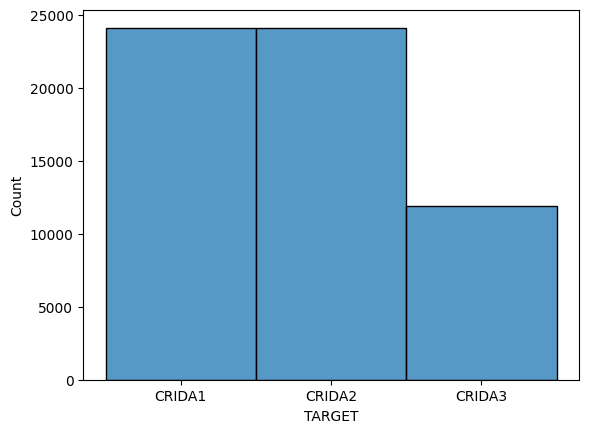

In [ ]:
sns.histplot(data=df, x='TARGET', bins=30)

<Axes: xlabel='BIDDING_ZONE_DESCR', ylabel='Count'>

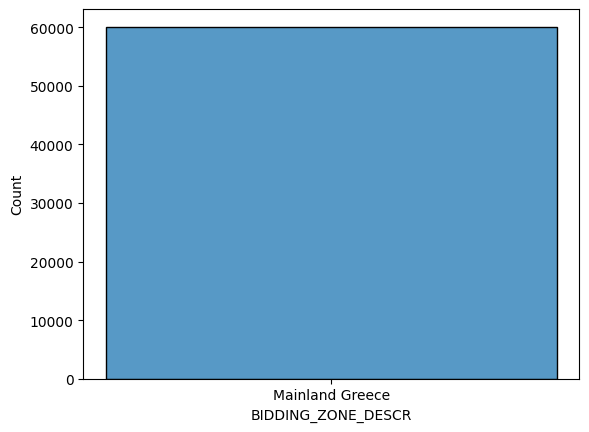

In [ ]:
sns.histplot(data=df, x='BIDDING_ZONE_DESCR', bins=30)

<Axes: xlabel='SIDE_DESCR', ylabel='Count'>

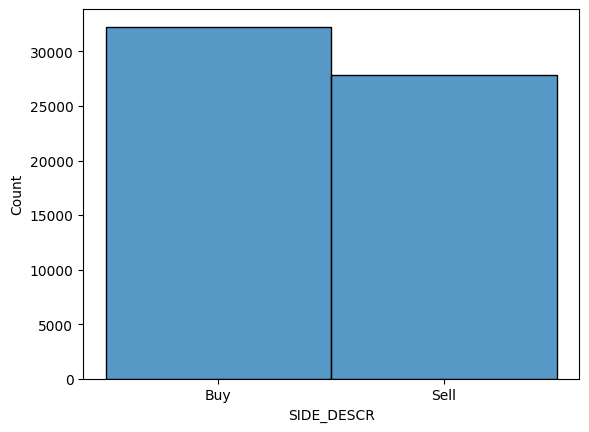

In [ ]:
sns.histplot(data=df, x='SIDE_DESCR', bins=30)

<Axes: xlabel='DDAY', ylabel='Count'>

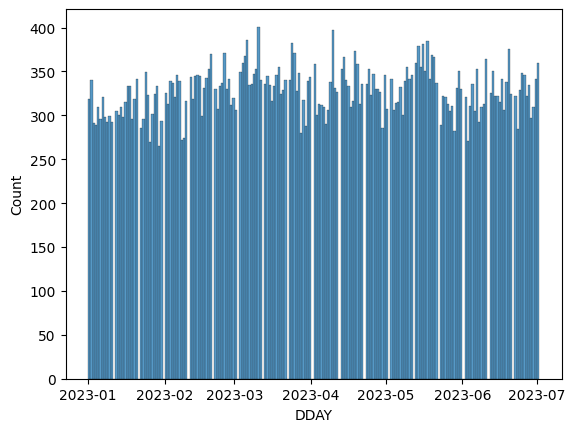

In [ ]:
sns.histplot(data=df, x='DDAY', bins=200)

<Axes: xlabel='ASSET_DESCR', ylabel='Count'>

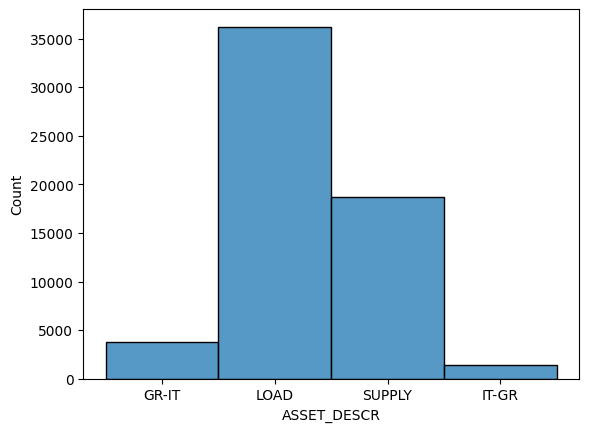

In [ ]:
sns.histplot(data=df, x='ASSET_DESCR', bins=30)

<Axes: xlabel='CLASSIFICATION', ylabel='Count'>

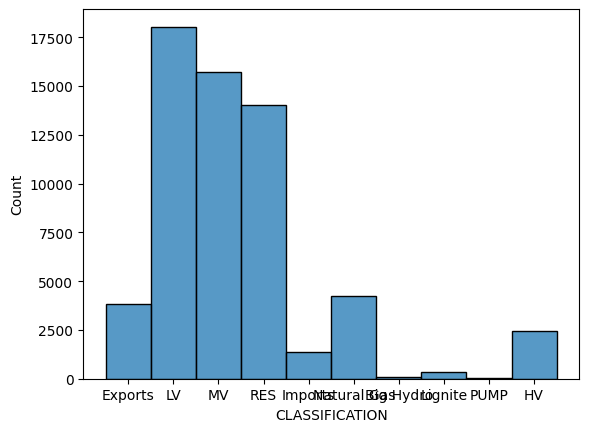

In [ ]:
sns.histplot(data=df, x='CLASSIFICATION', bins=30)

In [ ]:
classification_classes = df['CLASSIFICATION'].unique()

In [ ]:
print('All the classes in the CLASSIFICATION column are: ',classification_classes)

All the classes in the CLASSIFICATION column are:  ['Exports' 'LV' 'MV' 'RES' 'Imports' 'Natural Gas' 'Big Hydro' 'Lignite'
 'PUMP' 'HV']


<Axes: xlabel='DELIVERY_MTU', ylabel='Count'>

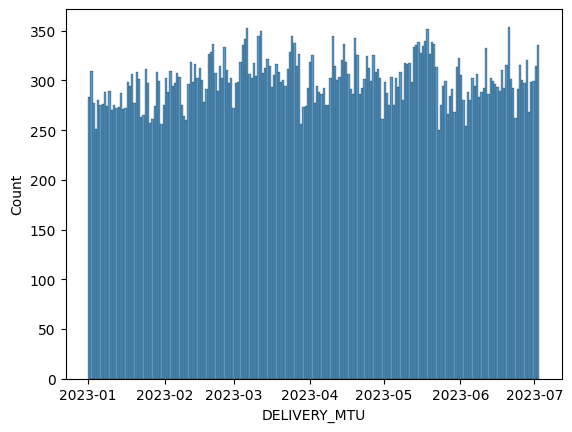

In [ ]:
sns.histplot(data=df, x='DELIVERY_MTU', bins=200)

<Axes: xlabel='DELIVERY_DURATION', ylabel='Count'>

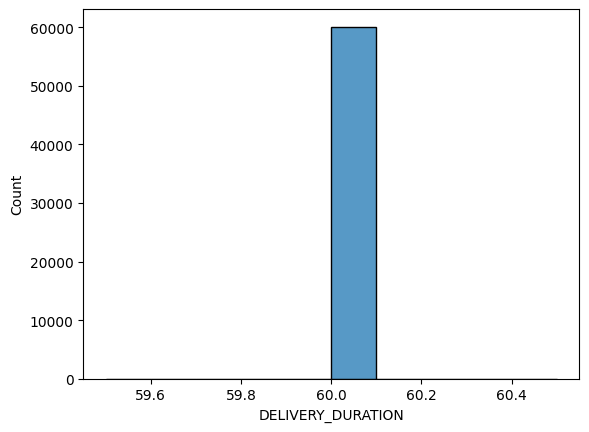

In [ ]:
sns.histplot(data=df, x='DELIVERY_DURATION', bins=10)

<Axes: xlabel='SORT', ylabel='Count'>

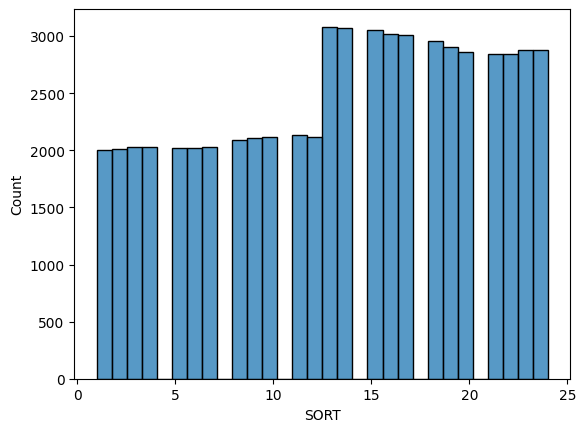

In [ ]:
sns.histplot(data=df, x='SORT', bins=30)

In [ ]:
classification_classes = df['SORT'].unique()
num = df['SORT'].nunique()

In [ ]:
print('The number of classes in the SORT column are: ', num,' and all the classes in the SORT column are: ',classification_classes)

The number of classes in the SORT column are:  24  and all the classes in the SORT column are:  [ 1 20 21  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 22 23 24]


<Axes: xlabel='MCP', ylabel='Count'>

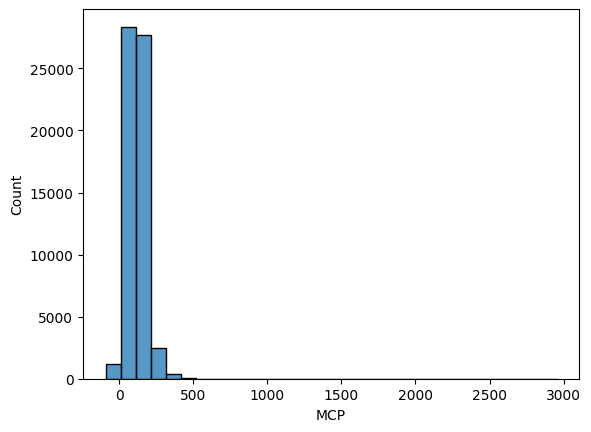

In [ ]:
sns.histplot(data=df, x='MCP', bins=30)

In [ ]:
classification_classes = df['MCP'].unique()
num = df['MCP'].nunique()

In [ ]:
print('The number of classes in the MCP column are: ', num,' and all the classes in the MPC column are: ',classification_classes)

The number of classes in the MCP column are:  6209  and all the classes in the MPC column are:  [2.1690e+02 2.6442e+02 2.4700e+02 ... 2.2000e-01 5.1890e+01 1.0789e+02]


<Axes: xlabel='TOTAL_TRADES', ylabel='Count'>

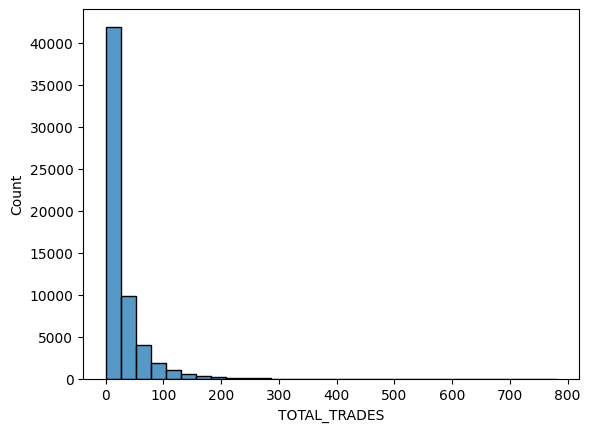

In [ ]:
sns.histplot(data=df, x='TOTAL_TRADES', bins=30)

In [ ]:
classification_classes = df['TOTAL_TRADES'].unique()
num = df['TOTAL_TRADES'].nunique()

In [ ]:
print('The number of classes in the TOTAL_TRADES column are: ', num,' and all the classes in the TOTAL_TRADES column are: ',classification_classes)

The number of classes in the TOTAL_TRADES column are:  30701  and all the classes in the TOTAL_TRADES column are:  [ 4.6    1.6    0.7   ... 33.842 31.907 31.079]


<Axes: xlabel='PUB_TIME', ylabel='Count'>

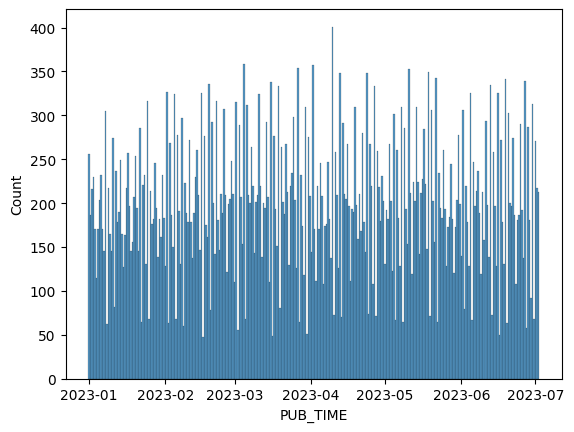

In [ ]:
sns.histplot(data=df, x='PUB_TIME', bins=300)

<Axes: xlabel='VER', ylabel='Count'>

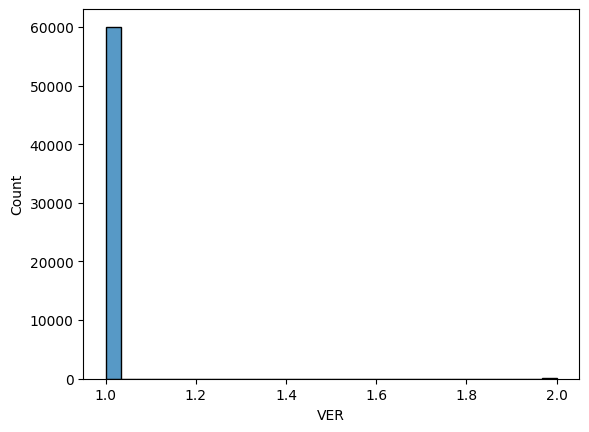

In [ ]:
sns.histplot(data=df, x='VER', bins=30)

#Based on the above visualization we can drop the columns: VER, DELIVERY_DURATION and BIDDING_ZONE_DESCR. Also we will drop the PUB_TIME as it is not relevant.

In [ ]:
df.drop(['BIDDING_ZONE_DESCR', 'DELIVERY_DURATION', 'VER', 'PUB_TIME'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60104 entries, 0 to 60103
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TARGET          60104 non-null  object        
 1   SIDE_DESCR      60104 non-null  object        
 2   DDAY            60104 non-null  datetime64[ns]
 3   ASSET_DESCR     60104 non-null  object        
 4   CLASSIFICATION  60104 non-null  object        
 5   DELIVERY_MTU    60104 non-null  datetime64[ns]
 6   SORT            60104 non-null  int64         
 7   MCP             60104 non-null  float64       
 8   TOTAL_TRADES    60104 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 4.1+ MB


In [ ]:
df.describe()

,SORT,MCP,TOTAL_TRADES
count,60104.000000,60104.000000,60104.000000
mean,13.541611,120.760827,24.790799
std,6.772068,57.825234,36.347526
min,1.000000,-90.280000,0.000000
25%,8.000000,85.000000,3.000000
50%,14.000000,113.730000,11.595500
75%,19.000000,149.530000,31.783750
max,24.000000,2952.510000,781.000000


#Corelation Matrix

In [ ]:
# prints data that will be plotted columns shown here are selected by corr() since they are ideal for the plot
print(df.corr())

                  SORT       MCP  TOTAL_TRADES
SORT          1.000000  0.151849      0.008635
MCP           0.151849  1.000000      0.023477
TOTAL_TRADES  0.008635  0.023477      1.000000


<ipython-input-21-8e153f886bf7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


<ipython-input-22-0f0532198e8d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), annot=True)


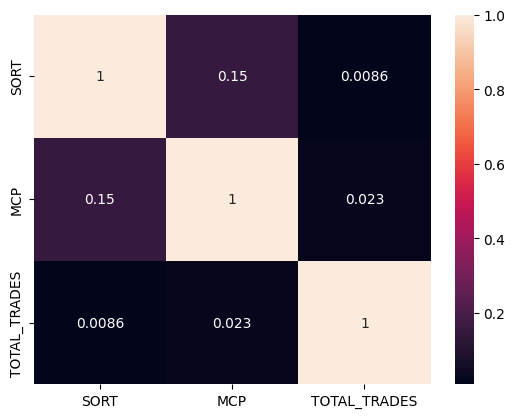

<Figure size 2500x2500 with 0 Axes>

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), annot=True)

# displaying heatmap
plt.figure(figsize=(25,25))
plt.show()

#Set index DELIVERY_MTU

In [ ]:
df.set_index('DELIVERY_MTU')

,TARGET,SIDE_DESCR,DDAY,ASSET_DESCR,CLASSIFICATION,SORT,MCP,TOTAL_TRADES
DELIVERY_MTU,,,,,,,,
2023-01-01 00:00:00,CRIDA1,Buy,2023-01-01,GR-IT,Exports,1,216.90,4.600
2023-01-01 19:00:00,CRIDA1,Buy,2023-01-01,GR-IT,Exports,20,264.42,1.600
2023-01-01 20:00:00,CRIDA1,Buy,2023-01-01,GR-IT,Exports,21,247.00,0.700
2023-01-01 00:00:00,CRIDA1,Buy,2023-01-01,LOAD,LV,1,216.90,23.745
2023-01-01 01:00:00,CRIDA1,Buy,2023-01-01,LOAD,LV,2,264.94,27.327
...,...,...,...,...,...,...,...,...
2023-07-02 19:00:00,CRIDA3,Sell,2023-07-02,SUPPLY,RES,20,107.89,45.276
2023-07-02 20:00:00,CRIDA3,Sell,2023-07-02,SUPPLY,RES,21,106.66,39.401
2023-07-02 21:00:00,CRIDA3,Sell,2023-07-02,SUPPLY,RES,22,113.71,33.842


#Find numerical Data Distribution

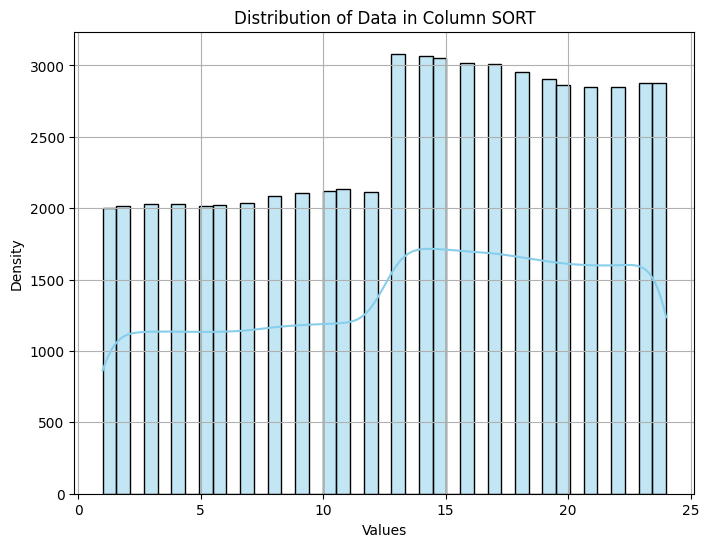

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['SORT'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Data in Column SORT')
plt.grid(True)
plt.show()

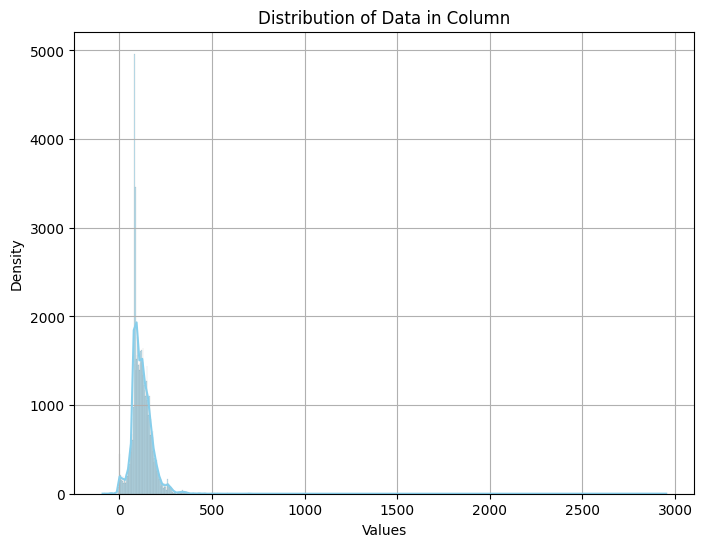

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['MCP'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Data in Column')
plt.grid(True)
plt.show()

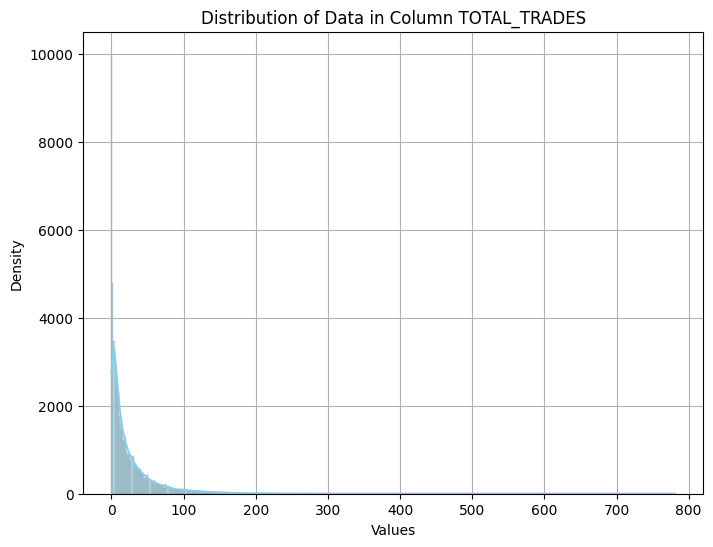

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['TOTAL_TRADES'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Data in Column TOTAL_TRADES')
plt.grid(True)
plt.show()

#Perform clustering for the categorical data. We use Kmodes, it's a library for clustering categorical data

#Look for outliers using the Z-score method

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60104 entries, 0 to 60103
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TARGET          60104 non-null  object        
 1   SIDE_DESCR      60104 non-null  object        
 2   DDAY            60104 non-null  datetime64[ns]
 3   ASSET_DESCR     60104 non-null  object        
 4   CLASSIFICATION  60104 non-null  object        
 5   DELIVERY_MTU    60104 non-null  datetime64[ns]
 6   SORT            60104 non-null  int64         
 7   MCP             60104 non-null  float64       
 8   TOTAL_TRADES    60104 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 4.1+ MB


In [ ]:
z_scores = (df['MCP'] - df['MCP'].mean()) / df['MCP'].std()

# Define the threshold for outlier detection (e.g., 3 or -3)
threshold = 2.999

# Identify outliers based on the threshold
outliers = df[abs(z_scores) > threshold]

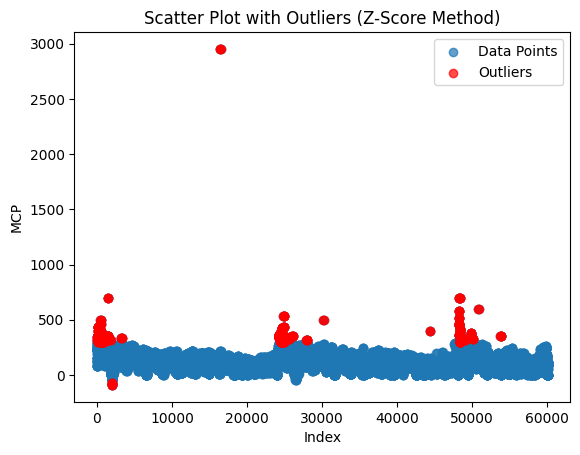

In [ ]:
# Plot the scatter plot of 'Number of Orders' with outliers highlighted in red
plt.scatter(df.index, df['MCP'], label='Data Points', alpha=0.7)
plt.scatter(outliers.index, outliers['MCP'], color='red', label='Outliers', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('MCP')
plt.title('Scatter Plot with Outliers (Z-Score Method)')
plt.legend()
plt.show()

In [ ]:
z_scores = (df['SORT'] - df['SORT'].mean()) / df['SORT'].std()

# Define the threshold for outlier detection (e.g., 3 or -3)
threshold = 2.999

# Identify outliers based on the threshold
outliers = df[abs(z_scores) > threshold]

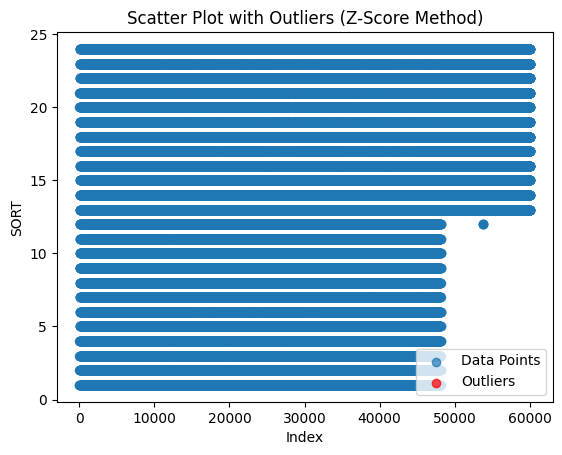

In [ ]:
# Plot the scatter plot of 'Number of Orders' with outliers highlighted in red
plt.scatter(df.index, df['SORT'], label='Data Points', alpha=0.7)
plt.scatter(outliers.index, outliers['SORT'], color='red', label='Outliers', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('SORT')
plt.title('Scatter Plot with Outliers (Z-Score Method)')
plt.legend()
plt.show()

In [ ]:
z_scores = (df['TOTAL_TRADES'] - df['TOTAL_TRADES'].mean()) / df['TOTAL_TRADES'].std()

# Define the threshold for outlier detection (e.g., 3 or -3)
threshold = 2.999

# Identify outliers based on the threshold
outliers = df[abs(z_scores) > threshold]

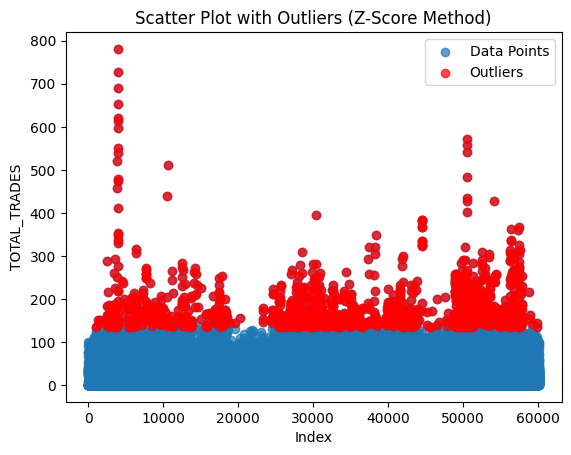

In [ ]:
# Plot the scatter plot of 'Number of Orders' with outliers highlighted in red
plt.scatter(df.index, df['TOTAL_TRADES'], label='Data Points', alpha=0.7)
plt.scatter(outliers.index, outliers['TOTAL_TRADES'], color='red', label='Outliers', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('TOTAL_TRADES')
plt.title('Scatter Plot with Outliers (Z-Score Method)')
plt.legend()
plt.show()

#Perform the same analysis for the Day-Ahead Market Results

#Load Data

In [ ]:
path = "/content/drive/MyDrive/EL-DAM_Results_HENEX.csv"
#df = pd.read_csv(path, parse_dates=["Trade Day"])
df1 = pd.read_csv(path)

the two indexes will be Instrument and Trading Day

In [ ]:
df1.head()

,Unnamed: 0,TARGET,BIDDING_ZONE_DESCR,SIDE_DESCR,DDAY,ASSET_DESCR,CLASSIFICATION,DELIVERY_MTU,DELIVERY_DURATION,SORT,MCP,TOTAL_TRADES,PUB_TIME,VER
0,0,DAM,Mainland Greece,Buy,20230102,GR-AL,Exports,2023-01-02 22:00:00,60,23,268.66,3.0,2023-01-01 14:21:59,1
1,1,DAM,Mainland Greece,Buy,20230102,GR-AL,Exports,2023-01-02 23:00:00,60,24,262.99,3.0,2023-01-01 14:21:59,1
2,2,DAM,Mainland Greece,Buy,20230102,GR-IT,Exports,2023-01-02 10:00:00,60,11,196.23,288.4,2023-01-01 14:21:59,1
3,3,DAM,Mainland Greece,Buy,20230102,GR-IT,Exports,2023-01-02 11:00:00,60,12,188.89,316.4,2023-01-01 14:21:59,1
4,4,DAM,Mainland Greece,Buy,20230102,GR-IT,Exports,2023-01-02 12:00:00,60,13,187.91,297.2,2023-01-01 14:21:59,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73353 entries, 0 to 73352
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          73353 non-null  int64  
 1   TARGET              73353 non-null  object 
 2   BIDDING_ZONE_DESCR  73353 non-null  object 
 3   SIDE_DESCR          73353 non-null  object 
 4   DDAY                73353 non-null  int64  
 5   ASSET_DESCR         73353 non-null  object 
 6   CLASSIFICATION      73353 non-null  object 
 7   DELIVERY_MTU        73353 non-null  object 
 8   DELIVERY_DURATION   73353 non-null  int64  
 9   SORT                73353 non-null  int64  
 10  MCP                 73353 non-null  float64
 11  TOTAL_TRADES        73353 non-null  float64
 12  PUB_TIME            73353 non-null  object 
 13  VER                 73353 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 7.8+ MB


#Bring the DDAY, DELIVERY_MTU and PUB_TIME columns to datetime form

In [ ]:
df1['DDAY'] = pd.to_datetime(df1['DDAY'], format="%Y%m%d")

In [ ]:
df1['DELIVERY_MTU'] = pd.to_datetime(df1['DELIVERY_MTU'])

In [ ]:
df1['PUB_TIME'] = pd.to_datetime(df1['PUB_TIME'])

In [ ]:
df1.head()

,Unnamed: 0,TARGET,BIDDING_ZONE_DESCR,SIDE_DESCR,DDAY,ASSET_DESCR,CLASSIFICATION,DELIVERY_MTU,DELIVERY_DURATION,SORT,MCP,TOTAL_TRADES,PUB_TIME,VER
0,0,DAM,Mainland Greece,Buy,2023-01-02,GR-AL,Exports,2023-01-02 22:00:00,60,23,268.66,3.0,2023-01-01 14:21:59,1
1,1,DAM,Mainland Greece,Buy,2023-01-02,GR-AL,Exports,2023-01-02 23:00:00,60,24,262.99,3.0,2023-01-01 14:21:59,1
2,2,DAM,Mainland Greece,Buy,2023-01-02,GR-IT,Exports,2023-01-02 10:00:00,60,11,196.23,288.4,2023-01-01 14:21:59,1
3,3,DAM,Mainland Greece,Buy,2023-01-02,GR-IT,Exports,2023-01-02 11:00:00,60,12,188.89,316.4,2023-01-01 14:21:59,1
4,4,DAM,Mainland Greece,Buy,2023-01-02,GR-IT,Exports,2023-01-02 12:00:00,60,13,187.91,297.2,2023-01-01 14:21:59,1


#Find Duplicate Indexes and Drop- NOT TO RUN WE DON'T HAVE DUPLICATE LINES

In [ ]:
bool_series = df1.duplicated()

In [ ]:
[i for i, x in enumerate(bool_series) if x]

[]

#Missing Values

In [ ]:
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
Unnamed: 0,0,0.0
TARGET,0,0.0
BIDDING_ZONE_DESCR,0,0.0
SIDE_DESCR,0,0.0
DDAY,0,0.0
ASSET_DESCR,0,0.0
CLASSIFICATION,0,0.0
DELIVERY_MTU,0,0.0
DELIVERY_DURATION,0,0.0
SORT,0,0.0


In [ ]:
df1.drop(['Unnamed: 0'], axis=1, inplace = True)

#Bar plot to see the different values of each column

In [ ]:
df1.columns

Index(['TARGET', 'BIDDING_ZONE_DESCR', 'SIDE_DESCR', 'DDAY', 'ASSET_DESCR',
       'CLASSIFICATION', 'DELIVERY_MTU', 'DELIVERY_DURATION', 'SORT', 'MCP',
       'TOTAL_TRADES', 'PUB_TIME', 'VER'],
      dtype='object')

<Axes: xlabel='TARGET', ylabel='Count'>

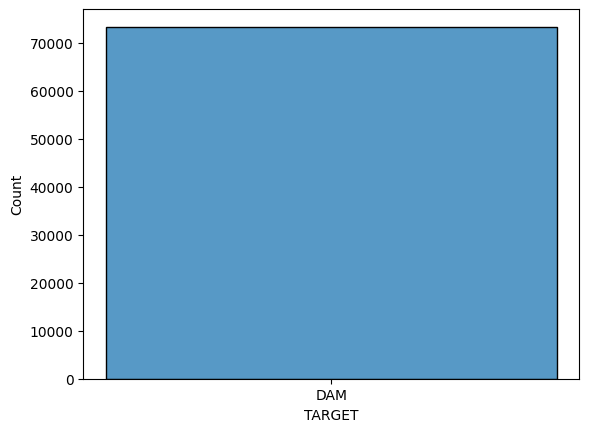

In [ ]:
sns.histplot(data=df1, x='TARGET', bins=30)

<Axes: xlabel='BIDDING_ZONE_DESCR', ylabel='Count'>

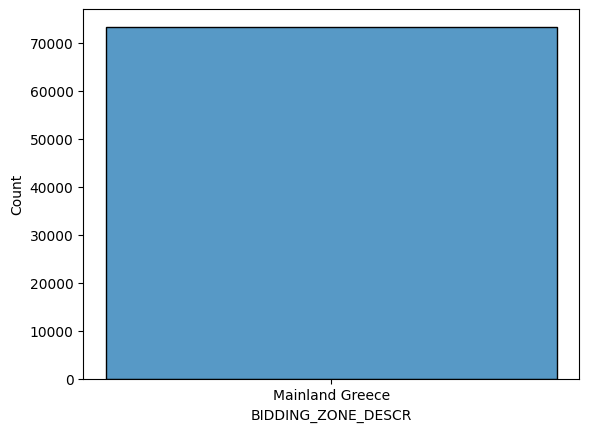

In [ ]:
sns.histplot(data=df1, x='BIDDING_ZONE_DESCR', bins=30)

<Axes: xlabel='SIDE_DESCR', ylabel='Count'>

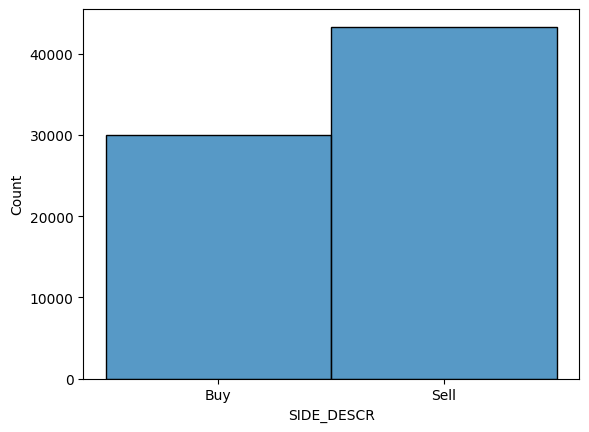

In [ ]:
sns.histplot(data=df1, x='SIDE_DESCR', bins=30)

<Axes: xlabel='DDAY', ylabel='Count'>

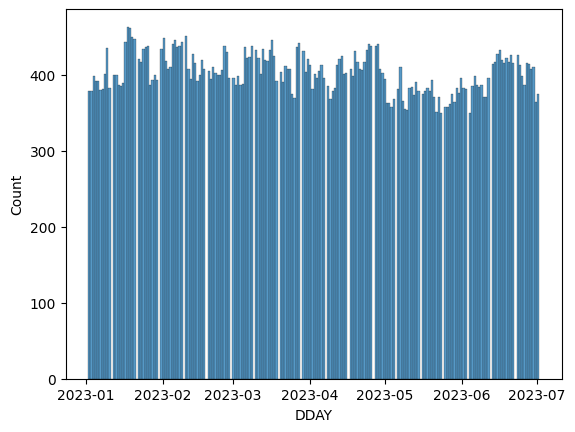

In [ ]:
sns.histplot(data=df1, x='DDAY', bins=200)

<Axes: xlabel='ASSET_DESCR', ylabel='Count'>

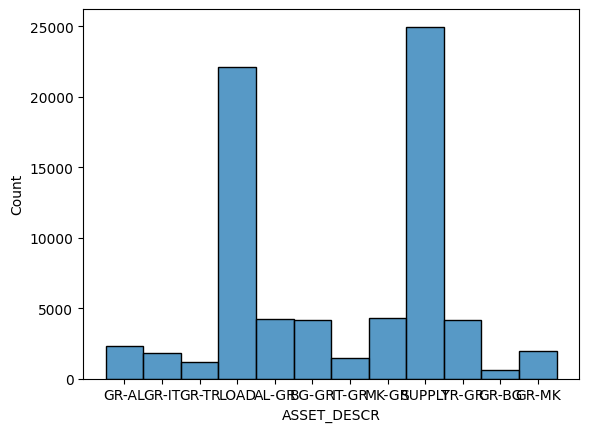

In [ ]:
sns.histplot(data=df1, x='ASSET_DESCR', bins=30)

<Axes: xlabel='CLASSIFICATION', ylabel='Count'>

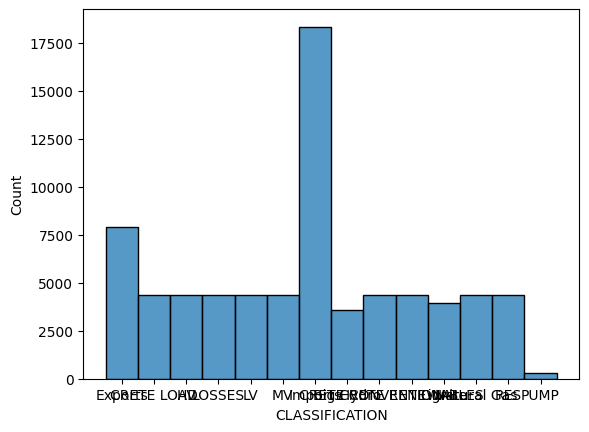

In [ ]:
sns.histplot(data=df1, x='CLASSIFICATION', bins=30)

<Axes: xlabel='DELIVERY_MTU', ylabel='Count'>

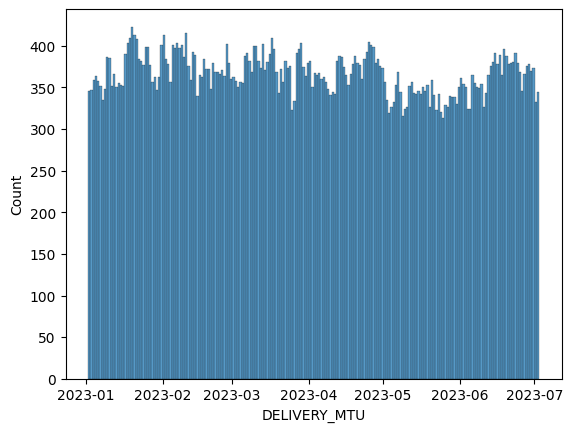

In [ ]:
sns.histplot(data=df1, x='DELIVERY_MTU', bins=200)

<Axes: xlabel='DELIVERY_DURATION', ylabel='Count'>

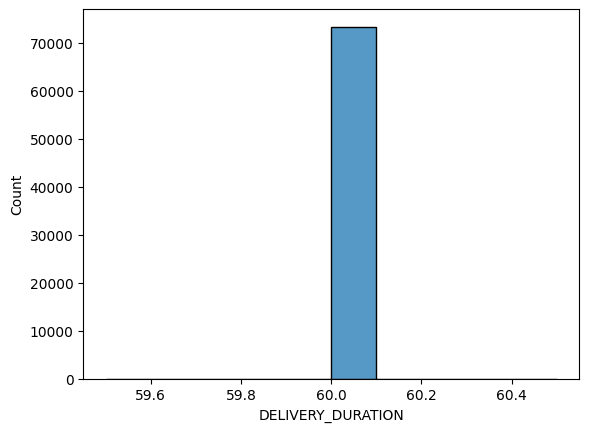

In [ ]:
sns.histplot(data=df1, x='DELIVERY_DURATION', bins=10)

<Axes: xlabel='SORT', ylabel='Count'>

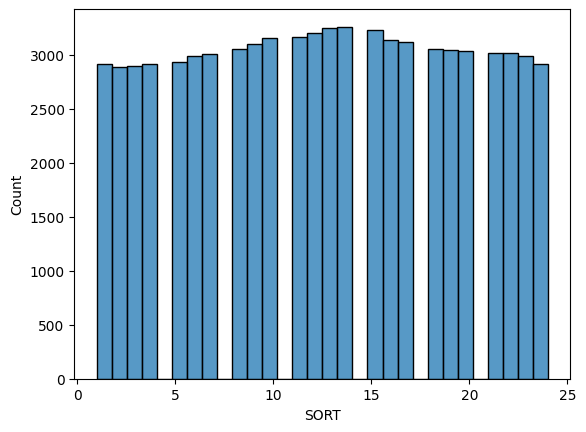

In [ ]:
sns.histplot(data=df1, x='SORT', bins=30)

<Axes: xlabel='MCP', ylabel='Count'>

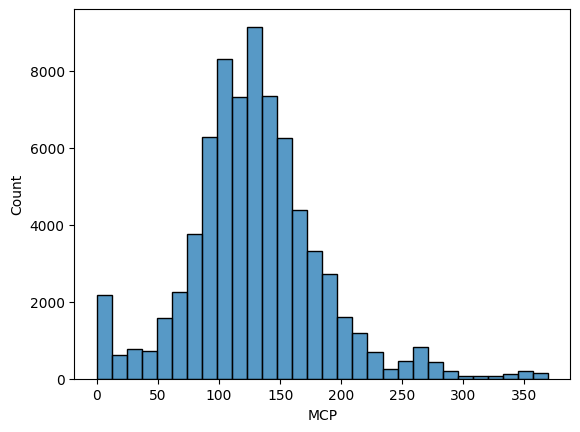

In [ ]:
sns.histplot(data=df1, x='MCP', bins=30)

<Axes: xlabel='TOTAL_TRADES', ylabel='Count'>

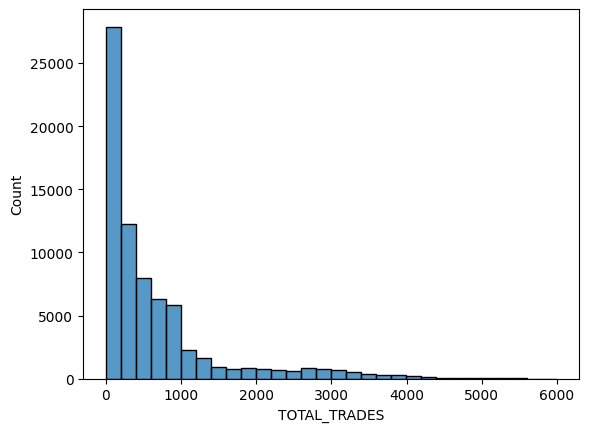

In [ ]:
sns.histplot(data=df1, x='TOTAL_TRADES', bins=30)

<Axes: xlabel='PUB_TIME', ylabel='Count'>

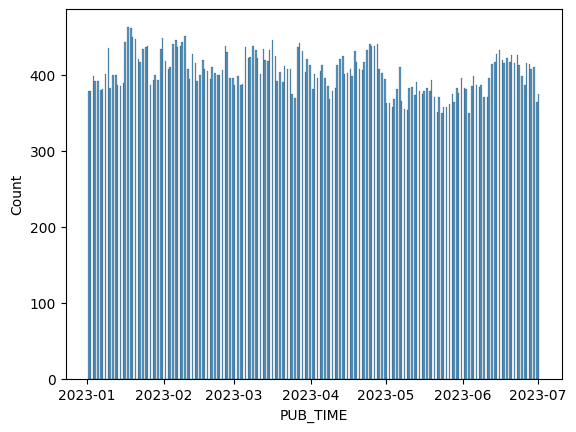

In [ ]:
sns.histplot(data=df1, x='PUB_TIME', bins=300)

<Axes: xlabel='VER', ylabel='Count'>

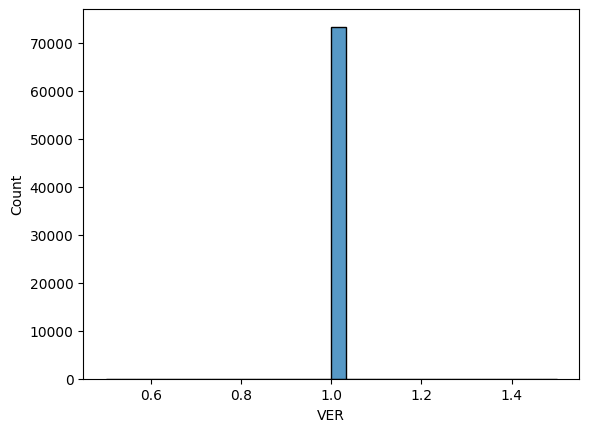

In [ ]:
sns.histplot(data=df1, x='VER', bins=30)

#Based on the above visualization we can drop the columns: VER, DELIVERY_DURATION and BIDDING_ZONE_DESCR. Also we will drop the PUB_TIME as it is not relevant.

In [ ]:
df1.drop(['BIDDING_ZONE_DESCR', 'DELIVERY_DURATION', 'VER', 'PUB_TIME'], axis = 1, inplace = True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73353 entries, 0 to 73352
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TARGET          73353 non-null  object        
 1   SIDE_DESCR      73353 non-null  object        
 2   DDAY            73353 non-null  datetime64[ns]
 3   ASSET_DESCR     73353 non-null  object        
 4   CLASSIFICATION  73353 non-null  object        
 5   DELIVERY_MTU    73353 non-null  datetime64[ns]
 6   SORT            73353 non-null  int64         
 7   MCP             73353 non-null  float64       
 8   TOTAL_TRADES    73353 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 5.0+ MB


In [ ]:
df1.describe()

,SORT,MCP,TOTAL_TRADES
count,73353.000000,73353.000000,73353.000000
mean,12.571606,129.575727,656.606857
std,6.822259,54.684020,866.464665
min,1.000000,0.000000,0.001000
25%,7.000000,98.740000,113.000000
50%,13.000000,127.320000,335.000000
75%,18.000000,155.760000,820.670000
max,24.000000,369.170000,5995.665000


#Corelation Matrix

In [ ]:
# prints data that will be plotted columns shown here are selected by corr() since they are ideal for the plot
print(df1.corr())

                  SORT       MCP  TOTAL_TRADES
SORT          1.000000  0.168891      0.059024
MCP           0.168891  1.000000      0.038471
TOTAL_TRADES  0.059024  0.038471      1.000000


<ipython-input-36-dfa32b58b5a1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df1.corr())


<ipython-input-37-7b3db2931c52>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df1.corr(), annot=True)


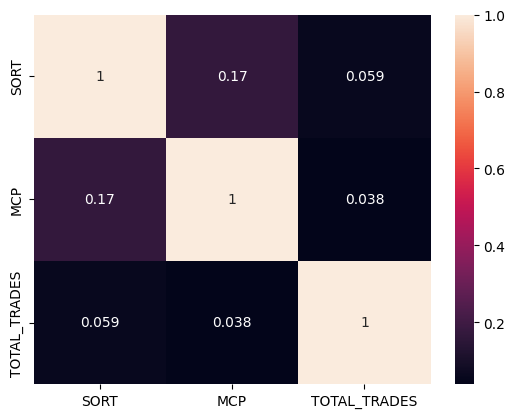

<Figure size 2500x2500 with 0 Axes>

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(df1.corr(), annot=True)

# displaying heatmap
plt.figure(figsize=(25,25))
plt.show()

#Set index DELIVERY_MTU

In [ ]:
df1.set_index('DELIVERY_MTU')

,TARGET,SIDE_DESCR,DDAY,ASSET_DESCR,CLASSIFICATION,SORT,MCP,TOTAL_TRADES
DELIVERY_MTU,,,,,,,,
2023-01-02 22:00:00,DAM,Buy,2023-01-02,GR-AL,Exports,23,268.66,3.0
2023-01-02 23:00:00,DAM,Buy,2023-01-02,GR-AL,Exports,24,262.99,3.0
2023-01-02 10:00:00,DAM,Buy,2023-01-02,GR-IT,Exports,11,196.23,288.4
2023-01-02 11:00:00,DAM,Buy,2023-01-02,GR-IT,Exports,12,188.89,316.4
2023-01-02 12:00:00,DAM,Buy,2023-01-02,GR-IT,Exports,13,187.91,297.2
...,...,...,...,...,...,...,...,...
2023-07-02 19:00:00,DAM,Sell,2023-07-02,TR-GR,Imports,20,109.30,50.0
2023-07-02 20:00:00,DAM,Sell,2023-07-02,TR-GR,Imports,21,110.75,50.0
2023-07-02 21:00:00,DAM,Sell,2023-07-02,TR-GR,Imports,22,112.47,50.0


#Find numerical Data Distribution

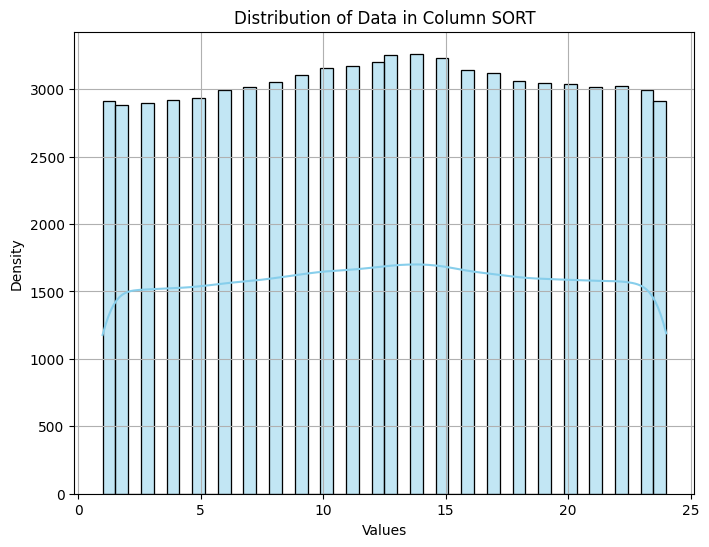

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['SORT'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Data in Column SORT')
plt.grid(True)
plt.show()

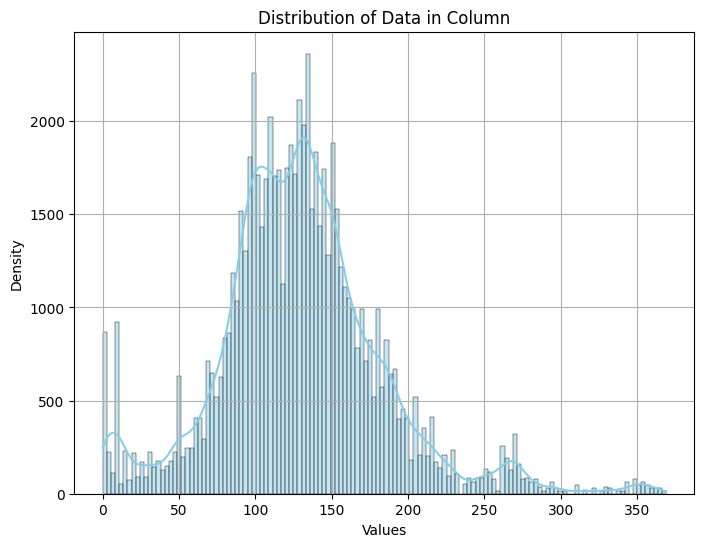

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['MCP'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Data in Column')
plt.grid(True)
plt.show()

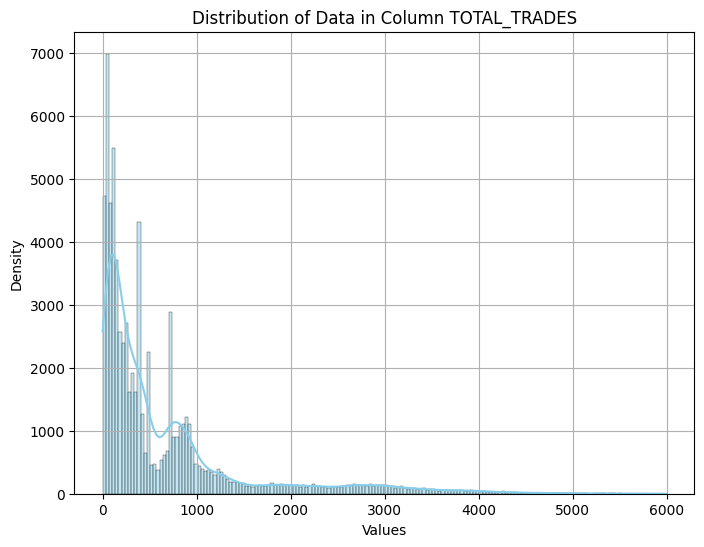

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['TOTAL_TRADES'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Data in Column TOTAL_TRADES')
plt.grid(True)
plt.show()

#Look for outliers using the Z-score method

In [ ]:
z_scores = (df1['MCP'] - df1['MCP'].mean()) / df1['MCP'].std()

# Define the threshold for outlier detection (e.g., 3 or -3)
threshold = 2.999

# Identify outliers based on the threshold
outliers = df1[abs(z_scores) > threshold]

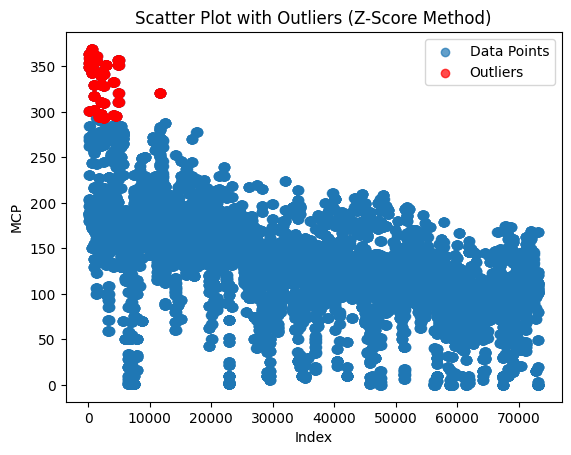

In [ ]:
# Plot the scatter plot of 'Number of Orders' with outliers highlighted in red
plt.scatter(df1.index, df1['MCP'], label='Data Points', alpha=0.7)
plt.scatter(outliers.index, outliers['MCP'], color='red', label='Outliers', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('MCP')
plt.title('Scatter Plot with Outliers (Z-Score Method)')
plt.legend()
plt.show()

In [ ]:
z_scores = (df1['SORT'] - df1['SORT'].mean()) / df1['SORT'].std()

# Define the threshold for outlier detection (e.g., 3 or -3)
threshold = 2.999

# Identify outliers based on the threshold
outliers = df1[abs(z_scores) > threshold]

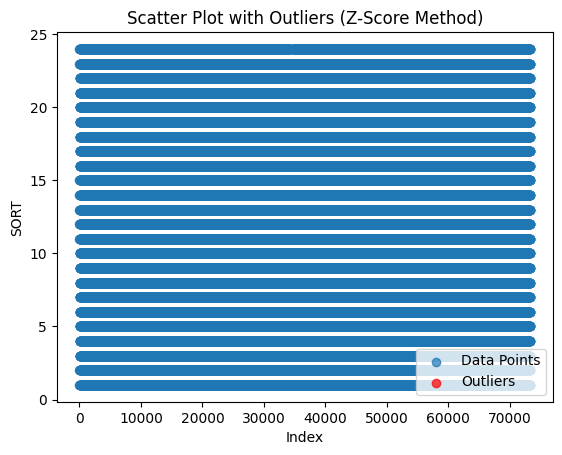

In [ ]:
# Plot the scatter plot of 'Number of Orders' with outliers highlighted in red
plt.scatter(df1.index, df1['SORT'], label='Data Points', alpha=0.7)
plt.scatter(outliers.index, outliers['SORT'], color='red', label='Outliers', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('SORT')
plt.title('Scatter Plot with Outliers (Z-Score Method)')
plt.legend()
plt.show()

In [ ]:
z_scores = (df1['TOTAL_TRADES'] - df1['TOTAL_TRADES'].mean()) / df1['TOTAL_TRADES'].std()

# Define the threshold for outlier detection (e.g., 3 or -3)
threshold = 2.999

# Identify outliers based on the threshold
outliers = df1[abs(z_scores) > threshold]

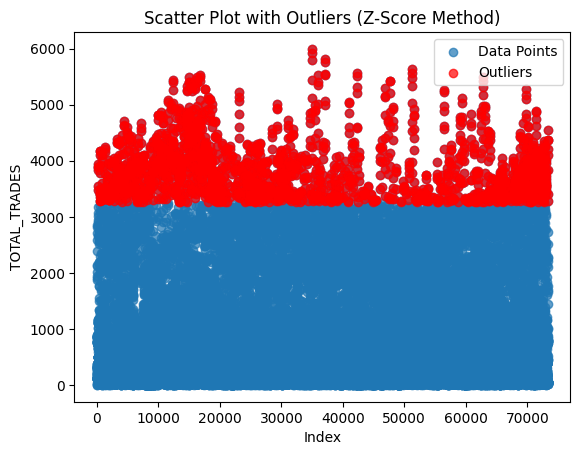

In [ ]:
# Plot the scatter plot of 'Number of Orders' with outliers highlighted in red
plt.scatter(df1.index, df1['TOTAL_TRADES'], label='Data Points', alpha=0.7)
plt.scatter(outliers.index, outliers['TOTAL_TRADES'], color='red', label='Outliers', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('TOTAL_TRADES')
plt.title('Scatter Plot with Outliers (Z-Score Method)')
plt.legend()
plt.show()

#Concat the two dataframes

In [ ]:
#Check if the two dataframes now have the same columns to concat them
df.columns == df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
df = pd.concat([df,df1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133457 entries, 0 to 73352
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   TARGET          133457 non-null  object        
 1   SIDE_DESCR      133457 non-null  object        
 2   DDAY            133457 non-null  datetime64[ns]
 3   ASSET_DESCR     133457 non-null  object        
 4   CLASSIFICATION  133457 non-null  object        
 5   DELIVERY_MTU    133457 non-null  datetime64[ns]
 6   SORT            133457 non-null  int64         
 7   MCP             133457 non-null  float64       
 8   TOTAL_TRADES    133457 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 10.2+ MB


#Find numerical Data Distribution

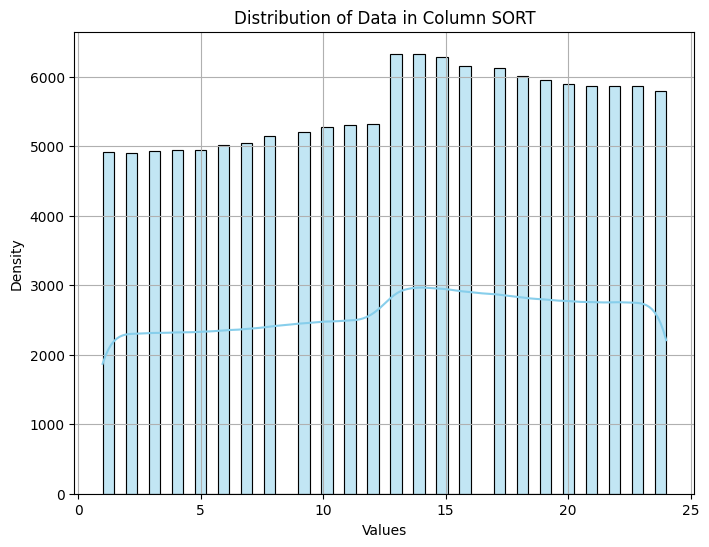

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['SORT'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Data in Column SORT')
plt.grid(True)
plt.show()

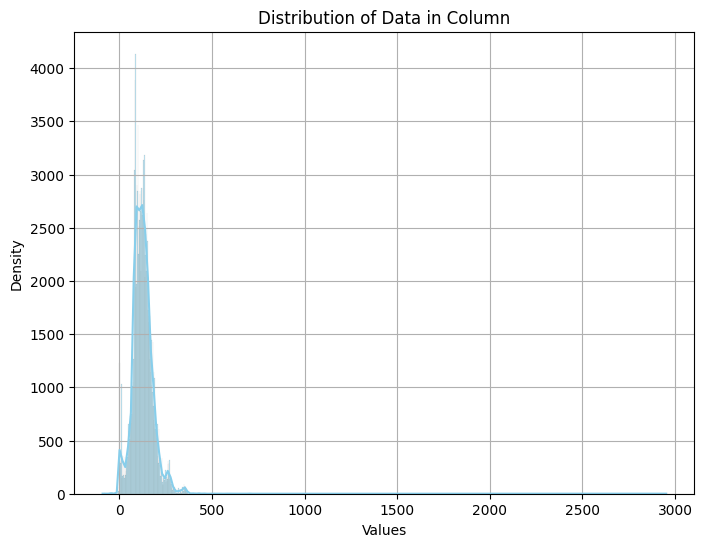

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['MCP'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Data in Column')
plt.grid(True)
plt.show()

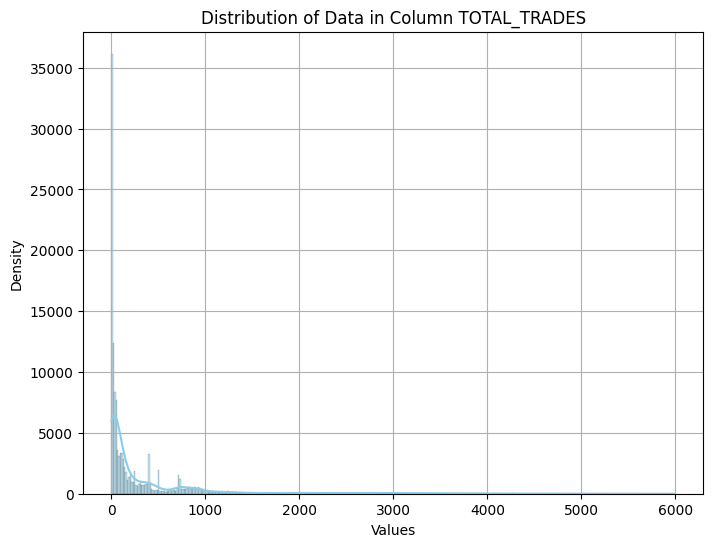

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['TOTAL_TRADES'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Data in Column TOTAL_TRADES')
plt.grid(True)
plt.show()

#Look for outliers using the Z-score method

In [ ]:
z_scores = (df['MCP'] - df['MCP'].mean()) / df['MCP'].std()

# Define the threshold for outlier detection (e.g., 3 or -3)
threshold = 2.999

# Identify outliers based on the threshold
outliers = df[abs(z_scores) > threshold]

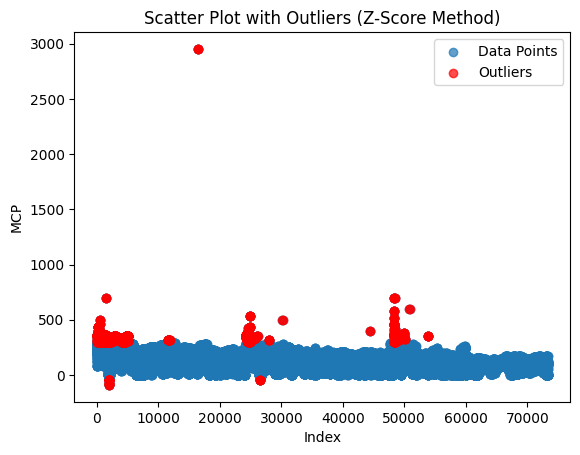

In [ ]:
# Plot the scatter plot of 'Number of Orders' with outliers highlighted in red
plt.scatter(df.index, df['MCP'], label='Data Points', alpha=0.7)
plt.scatter(outliers.index, outliers['MCP'], color='red', label='Outliers', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('MCP')
plt.title('Scatter Plot with Outliers (Z-Score Method)')
plt.legend()
plt.show()

In [ ]:
z_scores = (df['SORT'] - df['SORT'].mean()) / df['SORT'].std()

# Define the threshold for outlier detection (e.g., 3 or -3)
threshold = 2.999

# Identify outliers based on the threshold
outliers = df[abs(z_scores) > threshold]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


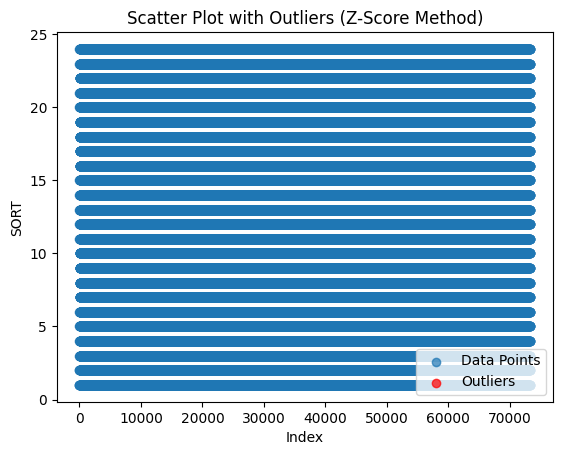

In [ ]:
# Plot the scatter plot of 'Number of Orders' with outliers highlighted in red
plt.scatter(df.index, df['SORT'], label='Data Points', alpha=0.7)
plt.scatter(outliers.index, outliers['SORT'], color='red', label='Outliers', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('SORT')
plt.title('Scatter Plot with Outliers (Z-Score Method)')
plt.legend()
plt.show()

In [ ]:
z_scores = (df['TOTAL_TRADES'] - df['TOTAL_TRADES'].mean()) / df['TOTAL_TRADES'].std()

# Define the threshold for outlier detection (e.g., 3 or -3)
threshold = 2.999

# Identify outliers based on the threshold
outliers = df[abs(z_scores) > threshold]

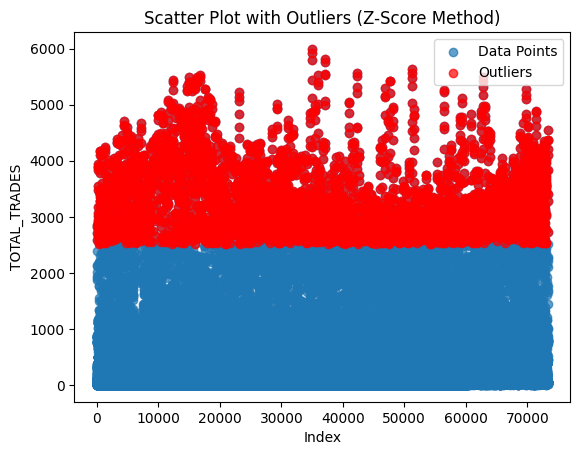

In [ ]:
# Plot the scatter plot of 'Number of Orders' with outliers highlighted in red
plt.scatter(df.index, df['TOTAL_TRADES'], label='Data Points', alpha=0.7)
plt.scatter(outliers.index, outliers['TOTAL_TRADES'], color='red', label='Outliers', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('TOTAL_TRADES')
plt.title('Scatter Plot with Outliers (Z-Score Method)')
plt.legend()
plt.show()

#Look for outliers

#Save to Google Drive and with this dataframe we will be working from now on

In [ ]:
path = "/content/drive/MyDrive/Market_Res"
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f, index=True)